<a href="https://colab.research.google.com/github/Goodnowcurr30/ML-and-DL-projects/blob/master/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
sns.set_theme(style='darkgrid')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Student performance/xAPI-Edu-Data.csv")

In [ ]:
df.head()

gender NationalITy  ... StudentAbsenceDays Class
0      M          KW  ...            Under-7     M
1      M          KW  ...            Under-7     M
2      M          KW  ...            Above-7     L
3      M          KW  ...            Above-7     L
4      M          KW  ...            Above-7     M

[5 rows x 17 columns]

In [ ]:
df.describe()

raisedhands  VisITedResources  AnnouncementsView  Discussion
count   480.000000        480.000000         480.000000  480.000000
mean     46.775000         54.797917          37.918750   43.283333
std      30.779223         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.750000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     100.000000         99.000000          98.000000   99.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.shape

(480, 17)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['NationalITy'] = le.fit_transform(df['NationalITy'])
df['PlaceofBirth'] = le.fit_transform(df['PlaceofBirth'])
df['StageID'] = le.fit_transform(df['StageID'])
df['SectionID'] = le.fit_transform(df['SectionID'])
df['GradeID'] = le.fit_transform(df['GradeID'])
df['Topic'] = le.fit_transform(df['Topic'])
df['Semester'] = le.fit_transform(df['Semester'])
df['Relation'] = le.fit_transform(df['Relation'])
df['ParentschoolSatisfaction'] = le.fit_transform(df['ParentschoolSatisfaction'])
df['ParentAnsweringSurvey'] = le.fit_transform(df['ParentAnsweringSurvey'])
df['StudentAbsenceDays'] = le.fit_transform(df['StudentAbsenceDays'])
df['Class'] = le.fit_transform(df['Class'])

df.head(20)

gender  NationalITy  ...  StudentAbsenceDays  Class
0        1            4  ...                   1      2
1        1            4  ...                   1      2
2        1            4  ...                   0      1
3        1            4  ...                   0      1
4        1            4  ...                   0      2
5        0            4  ...                   0      2
6        1            4  ...                   0      1
7        1            4  ...                   1      2
8        0            4  ...                   1      2
9        0            4  ...                   1      2
10       1            4  ...                   1      0
11       1            4  ...                   1      2
12       1            4  ...                   0      1
13       1           12  ...                   0      1
14       0            4  ...                   0      0
15       0            4  ...                   1      2
16       1            4  ...                   0      2
17       1            4  ...                   0      2
18       0            4  ...                   1      2
19       1            4  ...                   1      0

[20 rows x 17 columns]

In [ ]:
df['Class'].value_counts()

2    211
0    142
1    127
Name: Class, dtype: int64

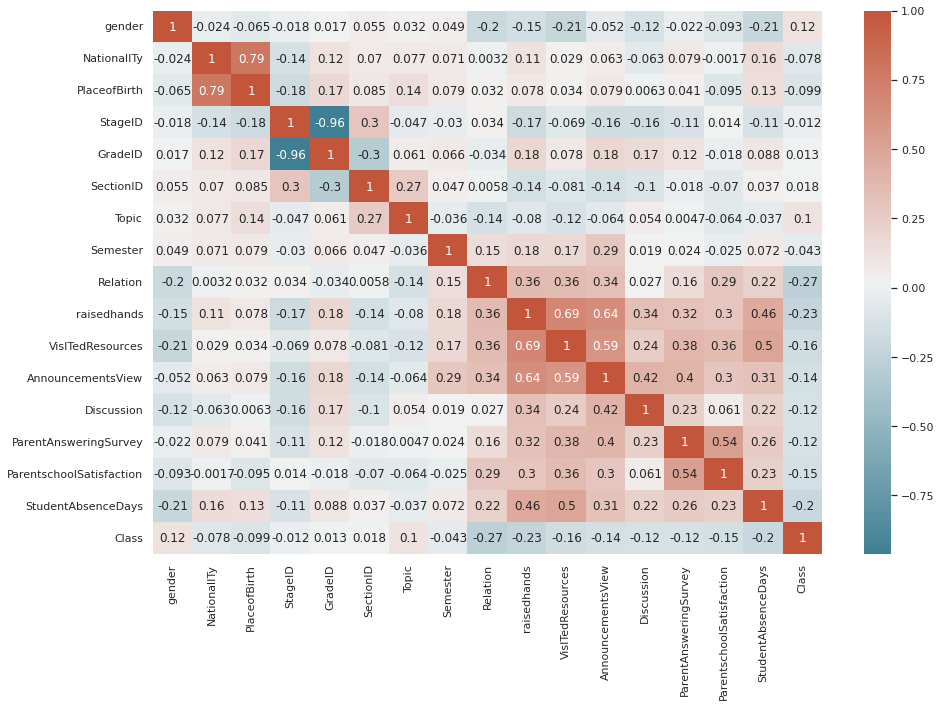

In [ ]:
# calculate correlation matrix

corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), 
            xticklabels=corr.columns, yticklabels=corr.columns)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
array = df.values
X = array[:,0:16]
Y = array[:,16]

In [ ]:
#X, Y = df.data, df.target

In [ ]:
#Feature Extraction
ft = SelectKBest(score_func=chi2, k=10)
fit = ft.fit(X, Y)

#Summarize score
np.set_printoptions(precision=3)
print(fit.scores_, "\n")

features = fit.transform(X)

#Summarize selected features
print(features[0:10, :], "\n")

#Summarize pvalue
print('Pvalues are: ', fit.pvalues_, "\n")
print('Number of features = ', fit.n_features_in_, "\n")
print('Transformed features names are: ', fit.get_feature_names_out(input_features=None))

[1.215e+01 6.955e+00 9.757e+00 1.361e+00 7.187e+00 5.159e-01 1.390e+01
 3.992e+00 4.797e+01 4.125e+03 4.701e+03 2.619e+03 8.093e+02 4.172e+01
 2.682e+01 8.961e+01] 

[[ 1  7  0 15 16  2 20  1  1  1]
 [ 1  7  0 20 20  3 25  1  1  1]
 [ 1  7  0 10  7  0 30  0  0  0]
 [ 1  7  0 30 25  5 35  0  0  0]
 [ 1  7  0 40 50 12 50  0  0  0]
 [ 0  7  0 42 30 13 70  1  0  0]
 [ 1  8  0 35 12  0 17  0  0  0]
 [ 1  8  0 50 10 15 22  1  1  1]
 [ 0  8  0 12 21 16 50  1  1  1]
 [ 0  7  0 70 80 25 70  1  1  1]] 

Pvalues are:  [2.299e-003 3.088e-002 7.608e-003 5.063e-001 2.751e-002 7.727e-001
 9.568e-004 1.359e-001 3.829e-011 0.000e+000 0.000e+000 0.000e+000
 1.787e-176 8.713e-010 1.502e-006 3.474e-020] 

Number of features =  16 

Transformed features names are:  ['x0' 'x6' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13' 'x14' 'x15']


In [ ]:
df.head()

gender  NationalITy  ...  StudentAbsenceDays  Class
0       1            4  ...                   1      2
1       1            4  ...                   1      2
2       1            4  ...                   0      1
3       1            4  ...                   0      1
4       1            4  ...                   0      2

[5 rows x 17 columns]

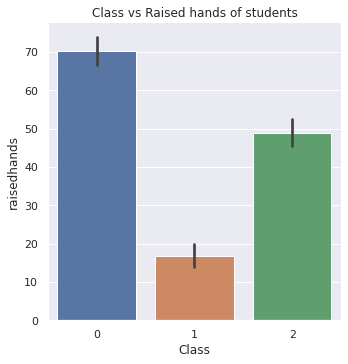

In [ ]:
sns.catplot(x='Class', y='raisedhands', hue=None, data=df, kind='bar').set(title='Class vs Raised hands of students')

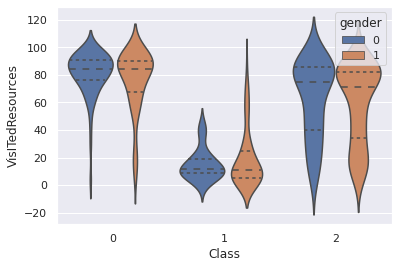

In [ ]:
sns.violinplot(x='Class', y='VisITedResources', hue='gender', data=df, inner='quartile')

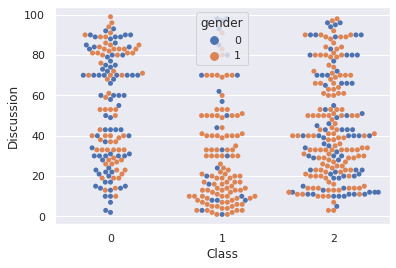

In [ ]:
sns.swarmplot(x='Class', y='Discussion', hue='gender', data=df)

In [ ]:
df.drop(df.columns[[1, 2, 3, 4, 5, 7]], axis=1, inplace=True)

In [ ]:
df.head(10)

gender  Topic  Relation  ...  ParentschoolSatisfaction  StudentAbsenceDays  Class
0       1      7         0  ...                         1                   1      2
1       1      7         0  ...                         1                   1      2
2       1      7         0  ...                         0                   0      1
3       1      7         0  ...                         0                   0      1
4       1      7         0  ...                         0                   0      2
5       0      7         0  ...                         0                   0      2
6       1      8         0  ...                         0                   0      1
7       1      8         0  ...                         1                   1      2
8       0      8         0  ...                         1                   1      2
9       0      7         0  ...                         1                   1      2

[10 rows x 11 columns]

# Prepare Data for Modeling

To prepare data for modeling, remember ASN (Assign, Split, Normalize)

In [ ]:
# Assign the 10 features to X, and the last column to our classification predictor y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [ ]:
# Normalize: Standardizing the data will transform the data so that its 
# distribution will have a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((384, 10), (96, 10), (384,), (96,))

# Modeling/Training

## Convolutional Neural Network

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv1D, Conv1D, MaxPooling1D, Activation, Flatten, Dropout, Dense, Input
)
from tensorflow.keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
# Reshape Data Sets to fit in Conv1D [batch_size, time_steps, input_dimentsion]

print(x_train.shape)
print(x_train[0].shape)
print(x_train[0])

(384, 10)
(10,)
[ 0.732  1.088 -0.814 -1.055 -1.555 -0.982 -1.236 -1.134 -1.222 -1.196]


That is in the current data set each sample has 10 features and no timesteps!

**Basically, we convert features to timesteps by reshaping 2D of input to 3D input
**

In [ ]:
sample_size = x_train.shape[0] # number of samples in train set
time_steps  = x_train.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

x_train_reshaped = x_train.reshape(sample_size,time_steps,input_dimension)
print("After reshape train data set shape:\n", x_train_reshaped.shape)
print("1 Sample shape:\n",x_train_reshaped[0].shape)
print("An example sample:\n", x_train_reshaped[0])

After reshape train data set shape:
 (384, 10, 1)
1 Sample shape:
 (10, 1)
An example sample:
 [[ 0.732]
 [ 1.088]
 [-0.814]
 [-1.055]
 [-1.555]
 [-0.982]
 [-1.236]
 [-1.134]
 [-1.222]
 [-1.196]]


After conversion, we have a train data set whose shape is

  `[batch_size, time_steps, input_dimension]` ---> `[384, 10, 1]`

That is, each sample has **10 time steps with 1 input dimension**. You can also think as `each sample has 10 rows 1 column`!

##Reminder
* `Conv1D(filters=1, kernel_size=7, activation='relu')` 

In [ ]:
# Reshaping the test data as well

x_test_reshaped = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
# Creating a Conv1D model

def build_conv1D_model():

  n_timesteps = x_train_reshaped.shape[1] #10
  n_features  = x_train_reshaped.shape[2] #1 
  model = Sequential(name="model_conv1D")
  model.add(Input(shape=(n_timesteps,n_features)))
  model.add(Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model.add(Dropout(0.5))
  model.add(Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))
  
  model.add(Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))
  
  model.add(MaxPooling1D(pool_size=1, name="MaxPooling1D"))
  model.add(Flatten())
  model.add(Dense(32, activation='relu', name="Dense_1"))
  model.add(Dense(n_features, name="Dense_2"))


  optimizer = RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['accuracy'])
  return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 4, 64)             512       
                                                                 
 dropout_3 (Dropout)         (None, 4, 64)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 2, 32)             6176      
                                                                 
 Conv1D_3 (Conv1D)           (None, 1, 16)             1040      
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 1, 16)            0         
                                                                 
 flatten_3 (Flatten)         (None, 16)                0         
                                                                 
 Dense_1 (Dense)             (None, 32)               

# Train the model

The model is trained for 500 epochs, and record the training and validation accuracy in the history object.

In [ ]:
EPOCHS = 1000

# Store training stats
history = model_conv1D.fit(x_train_reshaped, y_train, epochs = EPOCHS, validation_split=0.2, verbose=1)

Epoch 1/1000
10/10 [==============================] - 1s 26ms/step - loss: 1.9246 - accuracy: 0.2476 - val_loss: 1.4128 - val_accuracy: 0.3247
Epoch 2/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.0752 - accuracy: 0.2801 - val_loss: 0.7936 - val_accuracy: 0.2208
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.7427 - accuracy: 0.2964 - val_loss: 0.7357 - val_accuracy: 0.2208
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.7122 - accuracy: 0.2964 - val_loss: 0.7080 - val_accuracy: 0.2208
Epoch 5/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6794 - accuracy: 0.2964 - val_loss: 0.7102 - val_accuracy: 0.2208
Epoch 6/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.6657 - accuracy: 0.2964 - val_loss: 0.6790 - val_accuracy: 0.2208
Epoch 7/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6153 - accuracy: 0.2964 - val_loss: 0.6602 - val_accuracy: 0.2208
Epoch

In [ ]:
def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  _ = plt.plot([-100, 100],[-100,100])

  plt.figure()
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error")
  _ = plt.ylabel("Count")

In [ ]:
[loss, mae] = model_conv1D.evaluate(x_test_reshaped, y_test, verbose=0)
print("Testing set Mean Abs Error: {:7.2f}".format(mae))
print("Testing loss: {:7.2f}".format(loss))

Testing set Mean Abs Error:    0.48
Testing loss:    0.61


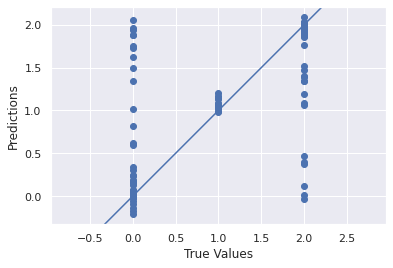

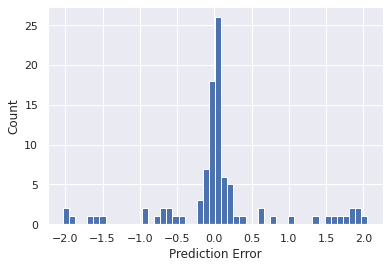

In [ ]:
# Finally predict student performance using data in the testing set

test_predictions = model_conv1D.predict(x_test_reshaped).flatten()
plot_prediction(y_test, test_predictions)

In [ ]:
print(y_test)

[0 0 1 1 0 0 0 2 0 1 2 2 0 2 2 0 1 1 0 1 0 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0 2
 2 2 2 2 2 2 1 2 2 2 2 2 0 2 0 1 2 0 0 1 2 0 2 1 0 1 2 2 0 2 0 1 0 0 0 0 1
 1 0 0 2 1 0 1 1 1 0 2 1 0 2 0 2 2 0 0 2 2 0]


In [ ]:
print(np.round(test_predictions))

[-0.  0.  1.  1.  2.  1.  0.  1.  2.  1.  2.  1.  1.  2.  1.  0.  1.  1.
  2.  1.  2.  2.  0.  2.  0.  0.  0.  2.  1.  1.  0.  1.  0.  1.  0.  0.
  2.  0.  2.  2.  0.  2.  2.  1.  2.  1.  2.  2.  2. -0.  0.  2.  1.  1.
  0.  0.  1.  2.  0.  2.  1. -0.  1.  2. -0.  0.  2.  2.  1.  0.  1. -0.
  0.  1.  1.  0. -0.  2.  1.  0.  1.  1.  1. -0.  0.  1.  1.  1.  2.  2.
  2. -0. -0.  2.  2. -0.]


In [ ]:
train_acc = model_conv1D.evaluate(x_train, y_train, verbose=0)
test_acc = model_conv1D.evaluate(x_test, y_test, verbose=0)
print("Training accuracy: ", train_acc)
print("Testing accuracy: ", test_acc)

Training accuracy:  [0.16632850468158722, 0.5104166865348816]
Testing accuracy:  [0.6093927025794983, 0.4791666567325592]


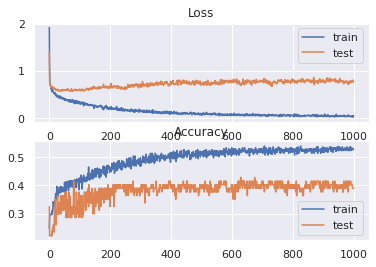

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## Multi-layer Perceptron

### Create the MLP model

Let's build an MLP model. Here, we'll use a Sequential model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model.

In [ ]:
def build_model():
  model = Sequential([
    Input(shape =(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
  ], name = 'MLP_model')

  optimizer = RMSprop(0.001)
  
  model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])

  return model

model = build_model()
model.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model training

history = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=1)

Epoch 1/1000
10/10 [==============================] - 1s 20ms/step - loss: 0.7544 - accuracy: 0.3355 - val_loss: 0.6839 - val_accuracy: 0.2727
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6315 - accuracy: 0.3225 - val_loss: 0.6407 - val_accuracy: 0.2857
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5736 - accuracy: 0.3453 - val_loss: 0.6074 - val_accuracy: 0.2727
Epoch 4/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5332 - accuracy: 0.3485 - val_loss: 0.5998 - val_accuracy: 0.2727
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4990 - accuracy: 0.3518 - val_loss: 0.5944 - val_accuracy: 0.2727
Epoch 6/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.4741 - accuracy: 0.3583 - val_loss: 0.5948 - val_accuracy: 0.2857
Epoch 7/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4482 - accuracy: 0.3648 - val_loss: 0.5824 - val_accuracy: 0.2727
Epoch

In [ ]:
[loss, mae] = model.evaluate(x_test, y_test, verbose=0)
print("Testing set Mean Abs Error: {:7.2f}".format(mae))
print("Testing loss: {:7.2f}".format(loss))

Testing set Mean Abs Error:    0.45
Testing loss:    0.73


## Predict

Finally, predict student performance using the testing set.

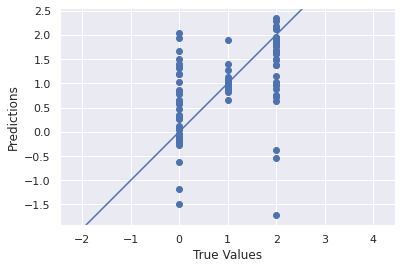

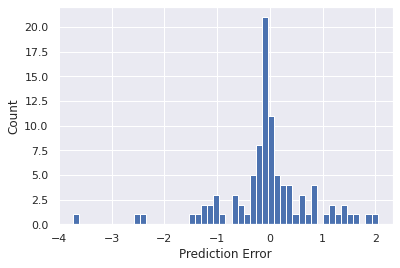

In [ ]:
test_predictions = model.predict(x_test).flatten()
plot_prediction(y_test, test_predictions)

In [ ]:
print(y_test)

[0 0 1 1 0 0 0 2 0 1 2 2 0 2 2 0 1 1 0 1 0 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0 2
 2 2 2 2 2 2 1 2 2 2 2 2 0 2 0 1 2 0 0 1 2 0 2 1 0 1 2 2 0 2 0 1 0 0 0 0 1
 1 0 0 2 1 0 1 1 1 0 2 1 0 2 0 2 2 0 0 2 2 0]


In [ ]:
print(np.round(test_predictions))
print("Shape of test prediction ", test_predictions.shape)

[ 0. -0.  1.  1.  2.  1. -1.  1.  2.  1.  2.  2. -0.  1. -2. -0.  1.  1.
  1.  1.  2.  2. -1.  2. -0. -1.  0.  0.  1. -1. -0.  1.  0.  2.  1.  0.
  2.  1.  2.  2.  1.  2.  2.  1.  1.  2.  2.  1.  2.  0.  1.  0.  1. -0.
  1. -0.  1.  2. -0.  2.  1.  0.  1.  1.  1.  1.  2.  1.  1.  0.  1.  1.
  1.  1.  1.  2.  0.  2.  1. -0.  1.  2.  1. -0.  1.  1.  1.  2.  1.  2.
  2. -0. -0.  2.  1.  1.]
Shape of test prediction  (96,)


In [ ]:
train_acc = model.evaluate(x_train, y_train, verbose=0)
test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Training accuracy: ", train_acc)
print("Testing accuracy: ", test_acc)

Training accuracy:  [0.2145438939332962, 0.5]
Testing accuracy:  [0.7344930768013, 0.4479166567325592]


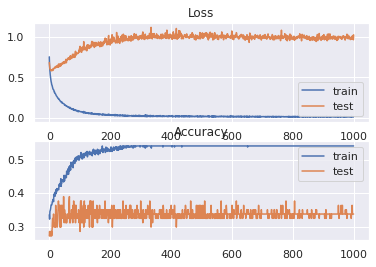

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()